Разведочный Анализ Данных (Exploratory Data Analysis, EDA)<br> 
<br> <br> 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
cont_features = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
train.drop(cont_features, axis=1, inplace=True)
train.head()
#категориальные признаки:

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [71]:
#пробиваем инфу по нашему датафрейму

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [73]:
#Делим столбец "Cabin" на две группы, на тех у кого есть запись про номер каюты и тех у кого записи нету.
#Проверяем связь с выживаемостью

In [74]:
train.groupby(train['Cabin'].isnull()).mean()

#False - есть запись о каюте
#True - нту записи о каюте

C:\Users\danil\AppData\Local\Temp\ipykernel_13804\369632649.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby(train['Cabin'].isnull()).mean()


,Survived
Cabin,
False,0.666667
True,0.299854


In [75]:
train['Cabin_indicator'] = np.where(train['Cabin'].isnull(), 0, 1)
train.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_indicator
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


<Figure size 640x480 with 0 Axes>

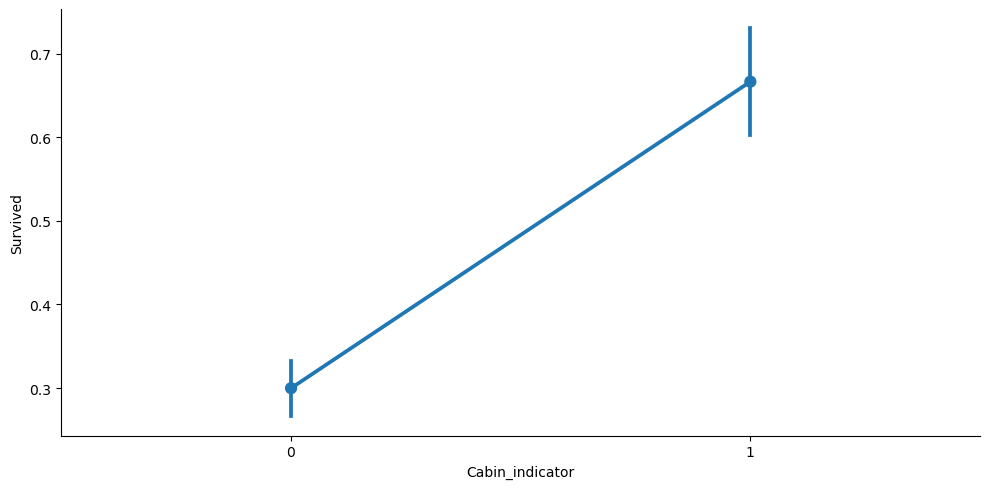

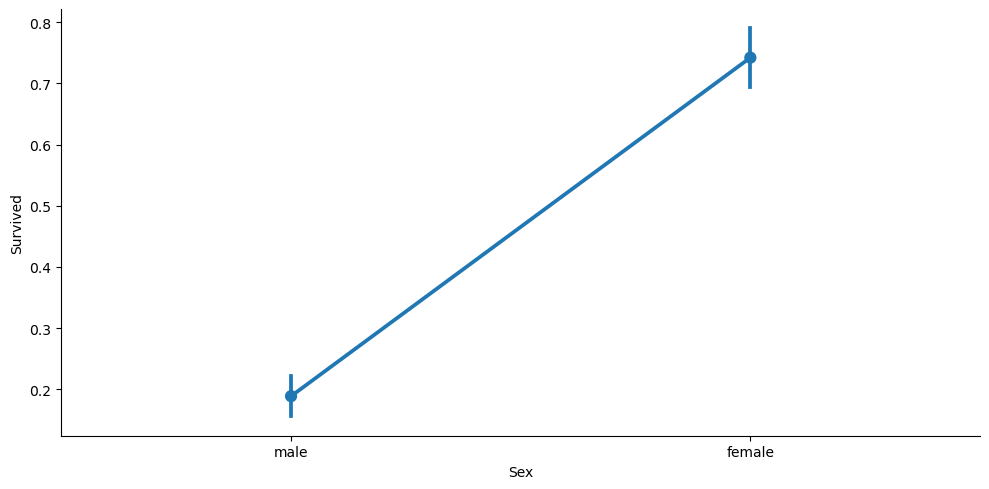

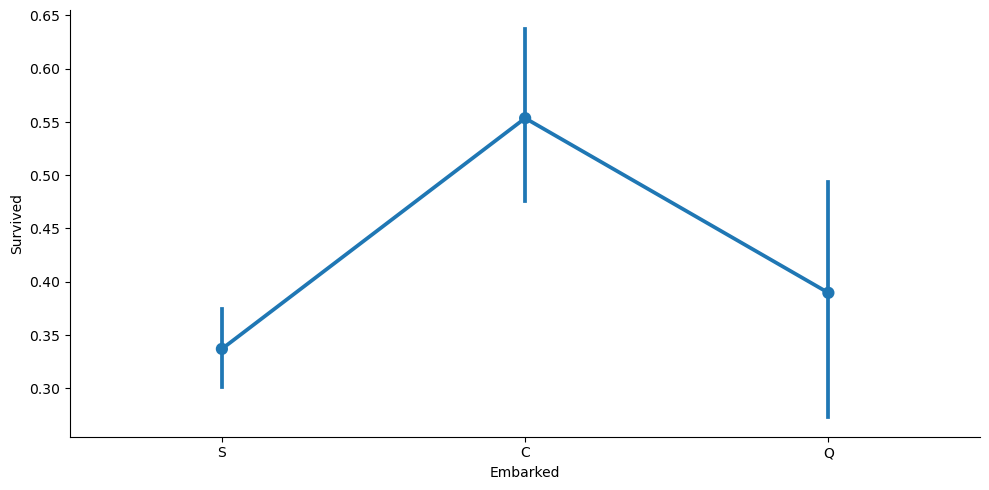

In [76]:
for i, col in enumerate(['Cabin_indicator', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=train, kind='point', aspect=2,)

In [77]:
#сводные таблицы:

In [78]:
train.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [79]:
train.pivot_table('Survived', index='Cabin_indicator', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_indicator,,,
0,99,73,515
1,69,4,129


In [80]:
train.drop(['Ticket'], axis=1, inplace=True)


In [81]:
train.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,male,NaN,S,0
1,1,female,C85,C,1
2,1,female,NaN,S,0
3,1,female,C123,S,1
4,0,male,NaN,S,0


In [84]:
b = {'male': 0, 'female': 1}

In [86]:
train['Sex'] = train['Sex'].map(b)

In [88]:
train.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,NaN,NaN,S,0
1,1,NaN,C85,C,1
2,1,NaN,NaN,S,0
3,1,NaN,C123,S,1
4,0,NaN,NaN,S,0


In [89]:
train.drop(['Cabin'], axis=1, inplace=True)

In [90]:
train.head()

,Survived,Sex,Embarked,Cabin_indicator
0,0,NaN,S,0
1,1,NaN,C,1
2,1,NaN,S,0
3,1,NaN,S,1
4,0,NaN,S,0
